## 1. Getting started with Auto-Keras

### 1.4. The MNIST Data Set

#### Load MNIST

In [2]:
from keras.datasets import mnist

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


#### Visualize MNIST

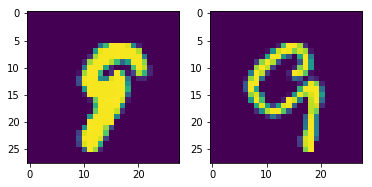

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
_, canvas = plt.subplots(1, 2)
_ = canvas[0].imshow(x_train[1235])
_ = canvas[1].imshow(x_test[4210])

#### Compute some statistics - train and test histograms

<Container object of 10 artists>

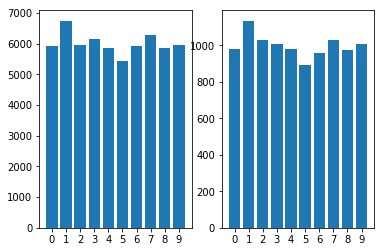

In [5]:
import numpy as np
train_hist = np.histogram(y_train)
test_hist = np.histogram(y_test)

_, canvas = plt.subplots(1, 2)
_ = canvas[0].set_xticks(range(10))
canvas[0].bar(range(10), train_hist[0])
_ = canvas[1].set_xticks(range(10))
canvas[1].bar(range(10), test_hist[0])

### 1.5. An Auto-Keras classifier for MNIST

#### Generate the model

In [6]:
from autokeras import ImageClassifier

clf = ImageClassifier(verbose=True)
clf.fit(x_train, y_train, time_limit=20 * 60)

Saving Directory: /tmp/autokeras_KGDM2Y
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   0.2899337843060493   |   0.9795999999999999   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
                              

#### Fit the final model

In [ ]:
#clf.final_fit(x_train, y_train, x_test, y_test, retrain=True)

#### Evaluate the final model

In [7]:
evaluation = clf.evaluate(x_test, y_test)
print(evaluation)

0.9868


### 1.6. Making predictions on our own data

In [10]:
from autokeras.image.image_supervised import load_image_dataset
x_custom, y_custom = load_image_dataset(csv_file_path='custom/custom.csv',
                                        images_path='custom')
print(x_custom.shape)
print(y_custom)
print(clf.predict(x_custom[:, :, :, 0]))

(1, 28, 28, 3)
['4']
[4]
